<a href="https://colab.research.google.com/github/SalahKhattab74/CardiovascularClassification/blob/main/Cardiovascular_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
import os
raw_data = pd.read_csv('/content/cardio_train.csv',delimiter=';')

In [ ]:
data = raw_data.copy()


In [ ]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
data.describe() 

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


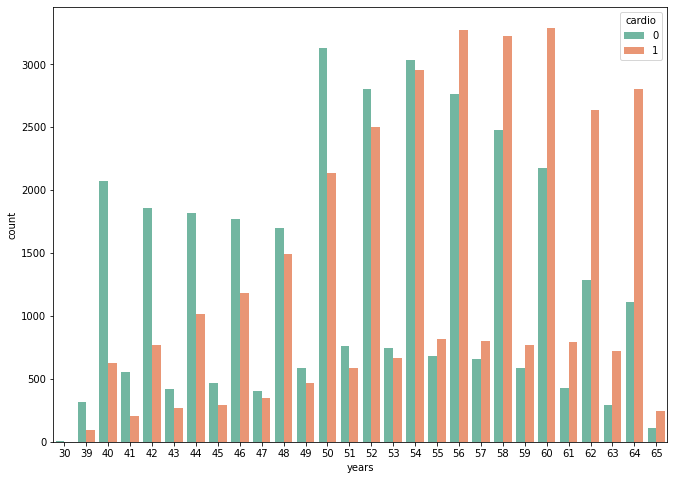

In [ ]:
#Age is measured in days, height is in centimeters
#Let's look ate the numerical variables and how are they spread among target class
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
data['years'] = (data['age'] / 365).round().astype('int')
sns.countplot(x='years', hue='cardio', data = data, palette="Set2");

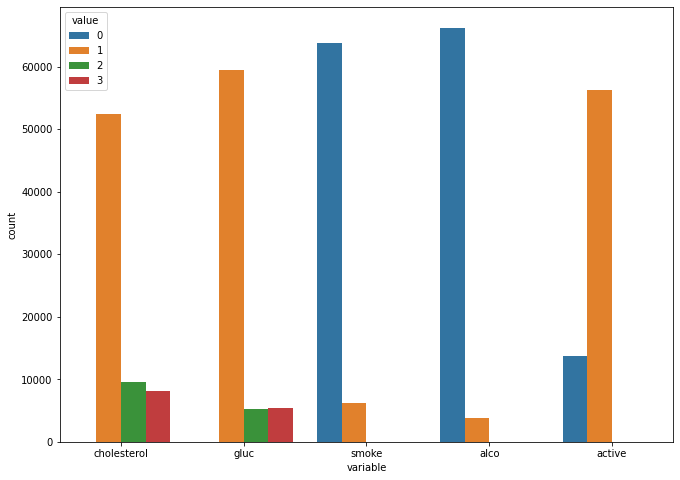

In [ ]:
#Categorical Features  
df_categorical = data.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
sns.countplot(x="variable", hue="value",data= pd.melt(df_categorical));


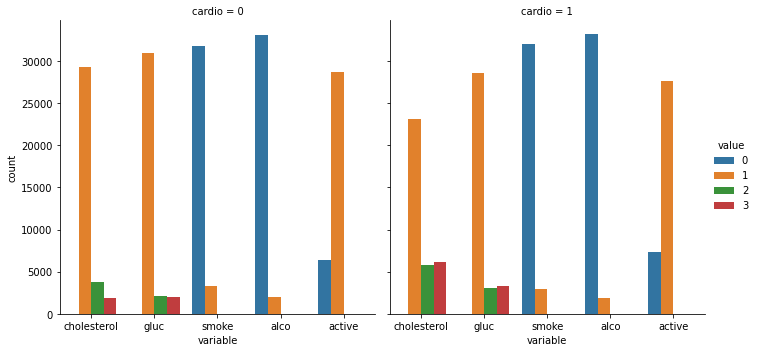

In [ ]:
df_long = pd.melt(data, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio",
                data=df_long, kind="count");


In [ ]:
#It can be clearly seen that patients with CVD have higher cholesterol and blood glucose level. And, generally speaking less active.
#To figure out whether "1" stands for women or men in gender column, let's calculate the mean of height per gender. We assume that men are higher than women on average.
data.groupby('gender')['height'].mean()
#MEAN IN group 2 is greater so 2 is men and 1 is women


gender
1    161.355612
2    169.947895
Name: height, dtype: float64

In [ ]:
data['gender'].value_counts()


1    45530
2    24470
Name: gender, dtype: int64

In [ ]:
data.groupby('gender')['alco'].sum()


gender
1    1161
2    2603
Name: alco, dtype: int64

In [ ]:
data['cardio'].value_counts(normalize=True)


0    0.5003
1    0.4997
Name: cardio, dtype: float64

In [ ]:
#Cleaning Data
data.isnull().values.any()


False

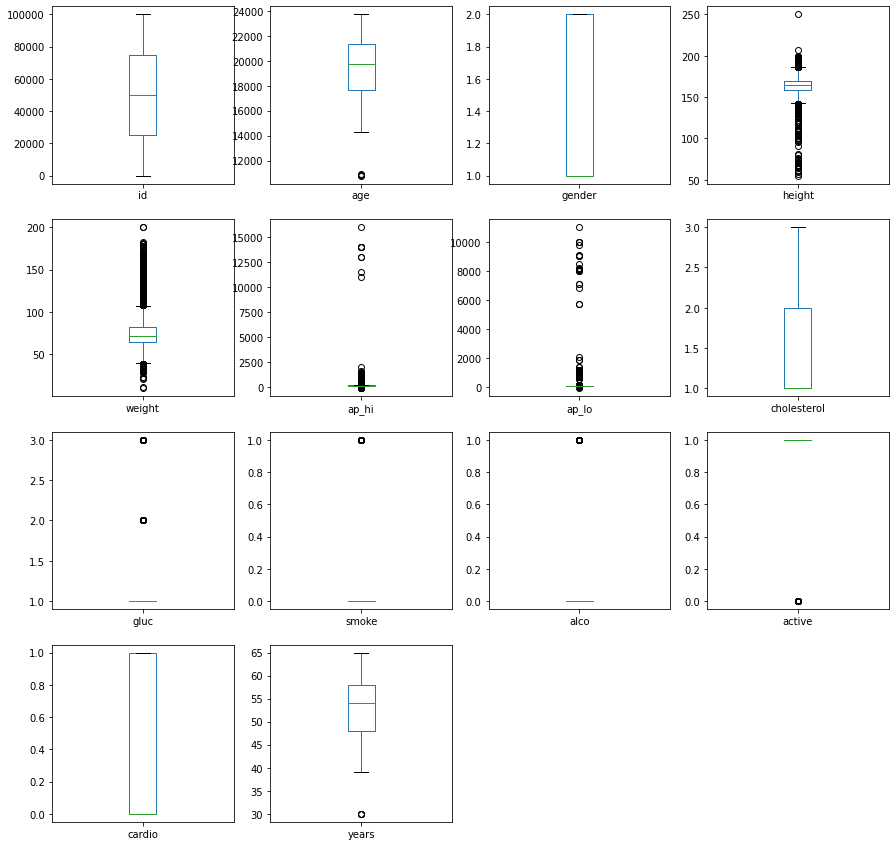

In [ ]:
data.plot(kind = 'box' , sharex = False , subplots = True , layout = (4,4) , figsize = ( 15 , 15))
plt.show()

In [ ]:
#There are outliers in the values after looking for it's describe
#minimum height is 55 cm and minimum weight is 10 kg. That has to be an error due to the age 
#Let's remove weights and heights, that fall below 2.5% or above 97.5% of a given range.
data.drop(data[(data['height'] > data['height'].quantile(0.975)) | (data['height'] < data['height'].quantile(0.025))].index,inplace=True)
data.drop(data[(data['weight'] > data['weight'].quantile(0.975)) | (data['weight'] < data['weight'].quantile(0.025))].index,inplace=True)


In [ ]:
#in some cases diastolic pressure is higher than systolic, which is also incorrect. How many records are inaccurate in terms of blood pressure
print("Diastilic pressure is higher than systolic one in {0} cases".format(data[data['ap_lo']> data['ap_hi']].shape[0]))
#also moreover blood pressure could not be negative value

Diastilic pressure is higher than systolic one in 1082 cases


In [ ]:
data.drop(data[(data['ap_hi'] > data['ap_hi'].quantile(0.975)) | (data['ap_hi'] < data['ap_hi'].quantile(0.025))].index,inplace=True)
data.drop(data[(data['ap_lo'] > data['ap_lo'].quantile(0.975)) | (data['ap_lo'] < data['ap_lo'].quantile(0.025))].index,inplace=True)


In [ ]:
print("Diastilic pressure is higher than systolic one in {0} cases".format(data[data['ap_lo']> data['ap_hi']].shape[0]))


Diastilic pressure is higher than systolic one in 0 cases


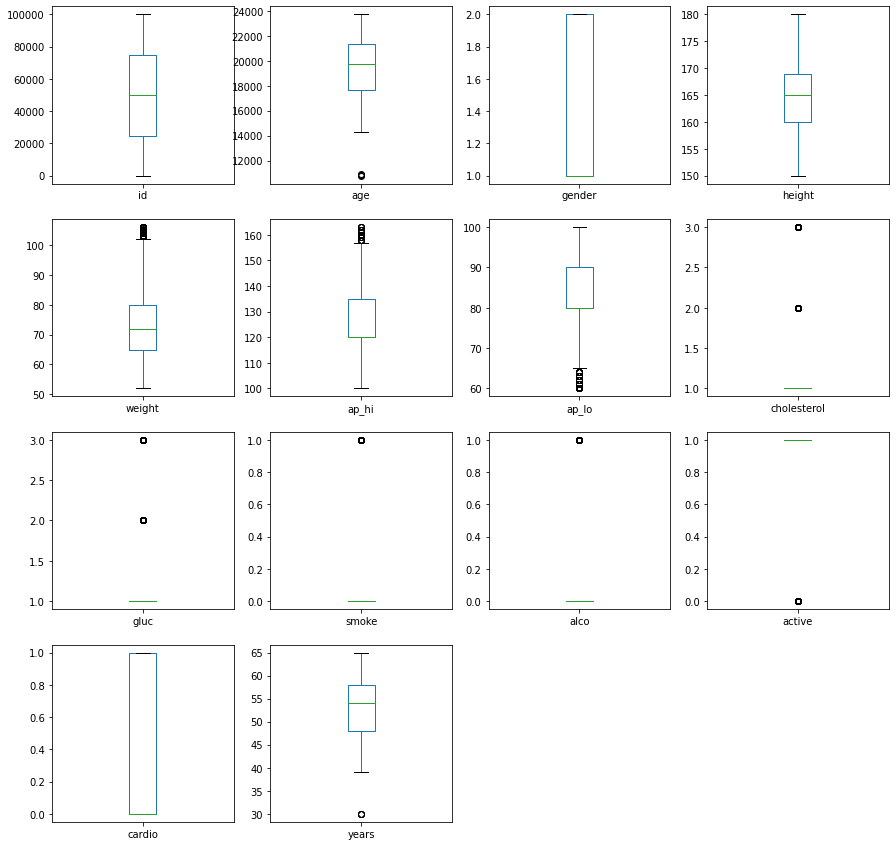

In [ ]:
data.plot(kind = 'box' , sharex = False , subplots = True , layout = (4,4) , figsize = ( 15 , 15))
plt.show()

In [ ]:
#Feature Engineering 
#Let's Make BMI feature which be = weight/height
data['BMI'] = data['weight']/((data['height']/100)**2)


In [ ]:
#There's a relation bewteen Systolic Diastolic blood pressure that derives pulse rate
def pulse(data):
    return np.subtract(data['ap_hi'], data['ap_lo'])
 
data['pulse'] = data.apply(pulse, axis=1)


In [ ]:
data['age'] = data['age'].div(365).apply(lambda x: int(x))


In [ ]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,BMI,pulse
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,30.0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,50.0
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,52,23.507805,60.0
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,50.0
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0,48,23.011177,40.0


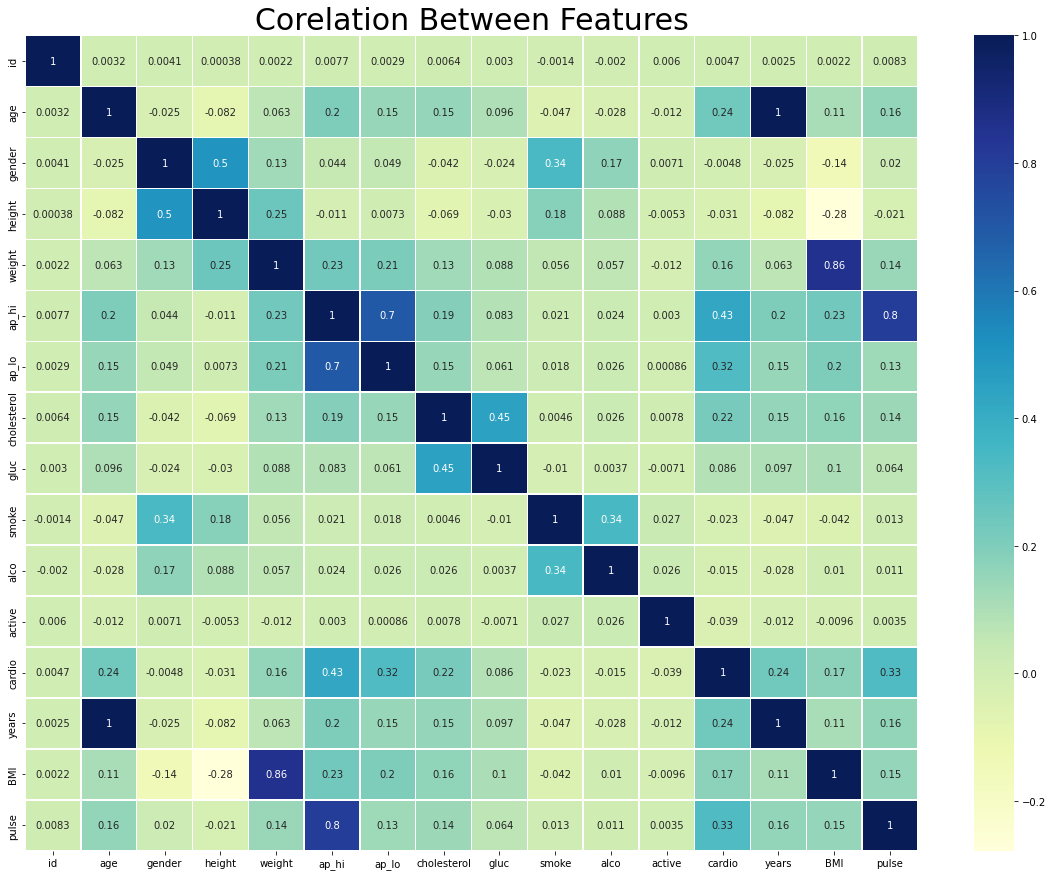

In [ ]:
plt.rcParams['figure.figsize'] = (20, 15) 
sns.heatmap(data.corr(), annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features', fontsize = 30)
plt.show()


In [ ]:
X = data.drop(['cardio', 'BMI', 'weight', 'gluc', 'gender', 'smoke', 'alco', 'active','id'], axis =1)
Y = data['cardio']


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standard_X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(standard_X, Y, test_size=0.2, random_state=42, shuffle = True)


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:

models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.717706 (0.007134)
KNN: 0.684201 (0.007687)
CART: 0.661380 (0.006596)
NB: 0.715669 (0.006972)


In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the grid of values for tol and max_iter
tol = [0.01,0.001,0.0001]
max_iter = [100,150,200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = {'tol':tol, 'max_iter':max_iter}

In [ ]:
logreg = LogisticRegression()
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Use scaler to rescale X and assign it to rescaledX
#rescaledX = scaler.fit_transform(X)

# Fit data to grid_model
grid_model_result = grid_model.fit(X_train, y_train)

# Summarize results
best_score, best_params = grid_model_result.best_score_,grid_model.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.717332 using {'max_iter': 100, 'tol': 0.01}
